In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}

In [2]:
anime = pd.read_csv('anime.csv')

In [3]:
anime.head(3)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262


In [4]:
anime.shape

(12294, 7)

In [5]:
user = pd.read_csv('rating.csv')

In [6]:
user.head(3)

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1


In [7]:
user.shape

(7813737, 3)

In [8]:
# User 1 has a negative in rating mean

user[user['user_id'] == 1].rating.mean()

-0.7124183006535948

In [9]:
# User 2 has a very low in rating mean

user[user['user_id'] == 2].rating.mean()

2.6666666666666665

In [10]:
# Rating mean of user 5 is very close to 5 which is half of max rating

user[user['user_id'] == 5].rating.mean()

4.263383297644539

In [11]:
MRPU = user.groupby(['user_id']).mean().reset_index()
MRPU['mean_rating'] = MRPU['rating']

MRPU.drop(['anime_id','rating'],axis=1, inplace=True)

In [12]:
MRPU.head(3)

,user_id,mean_rating
0,1,-0.712418
1,2,2.666667
2,3,7.382979


In [13]:
user = pd.merge(user, MRPU, on=['user_id','user_id'])

In [14]:
user.head(3)

,user_id,anime_id,rating,mean_rating
0,1,20,-1,-0.712418
1,1,24,-1,-0.712418
2,1,79,-1,-0.712418


In [15]:
user = user.drop(user[user.rating < user.mean_rating].index)

In [16]:
# 3 anime were assigned as user 1 favorite anime

user[user['user_id'] == 1].head(3)

,user_id,anime_id,rating,mean_rating
47,1,8074,10,-0.712418
81,1,11617,10,-0.712418
83,1,11757,10,-0.712418


In [17]:
# user2 favorite only one anime

user[user['user_id'] == 2].head(10)

,user_id,anime_id,rating,mean_rating
153,2,11771,10,2.666667


In [18]:
user[user['user_id'] == 5].head(3)

,user_id,anime_id,rating,mean_rating
302,5,6,8,4.263383
303,5,15,6,4.263383
304,5,17,6,4.263383


In [19]:
user.shape

(4262566, 4)

In [20]:
user["user_id"].unique()

array([    1,     2,     3, ..., 73514, 73515, 73516], dtype=int64)

In [21]:
# merge 2 dataset
mergedata = pd.merge(anime,user,on=['anime_id','anime_id'])
mergedata= mergedata[mergedata.user_id <= 20000]
mergedata.head(3)

,anime_id,name,genre,type,episodes,rating_x,members,user_id,rating_y,mean_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10,7.699301
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10,8.729242
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10,7.372287


In [22]:
len(mergedata['anime_id'].unique())

7852

In [23]:
len(anime['anime_id'].unique())

12294

In [24]:
user_anime = pd.crosstab(mergedata['user_id'], mergedata['name'])
user_anime.head(3)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
user_anime.shape

(20000, 7852)

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca.fit(user_anime)
pca_samples = pca.transform(user_anime)

In [27]:
ps = pd.DataFrame(pca_samples)
ps.head(3)

,0,1,2
0,-1.579129,-0.500240,0.415758
1,-1.773553,-0.272593,0.116385
2,0.218814,-1.232282,-0.985804


In [28]:
tocluster = pd.DataFrame(ps[[0,1,2]])

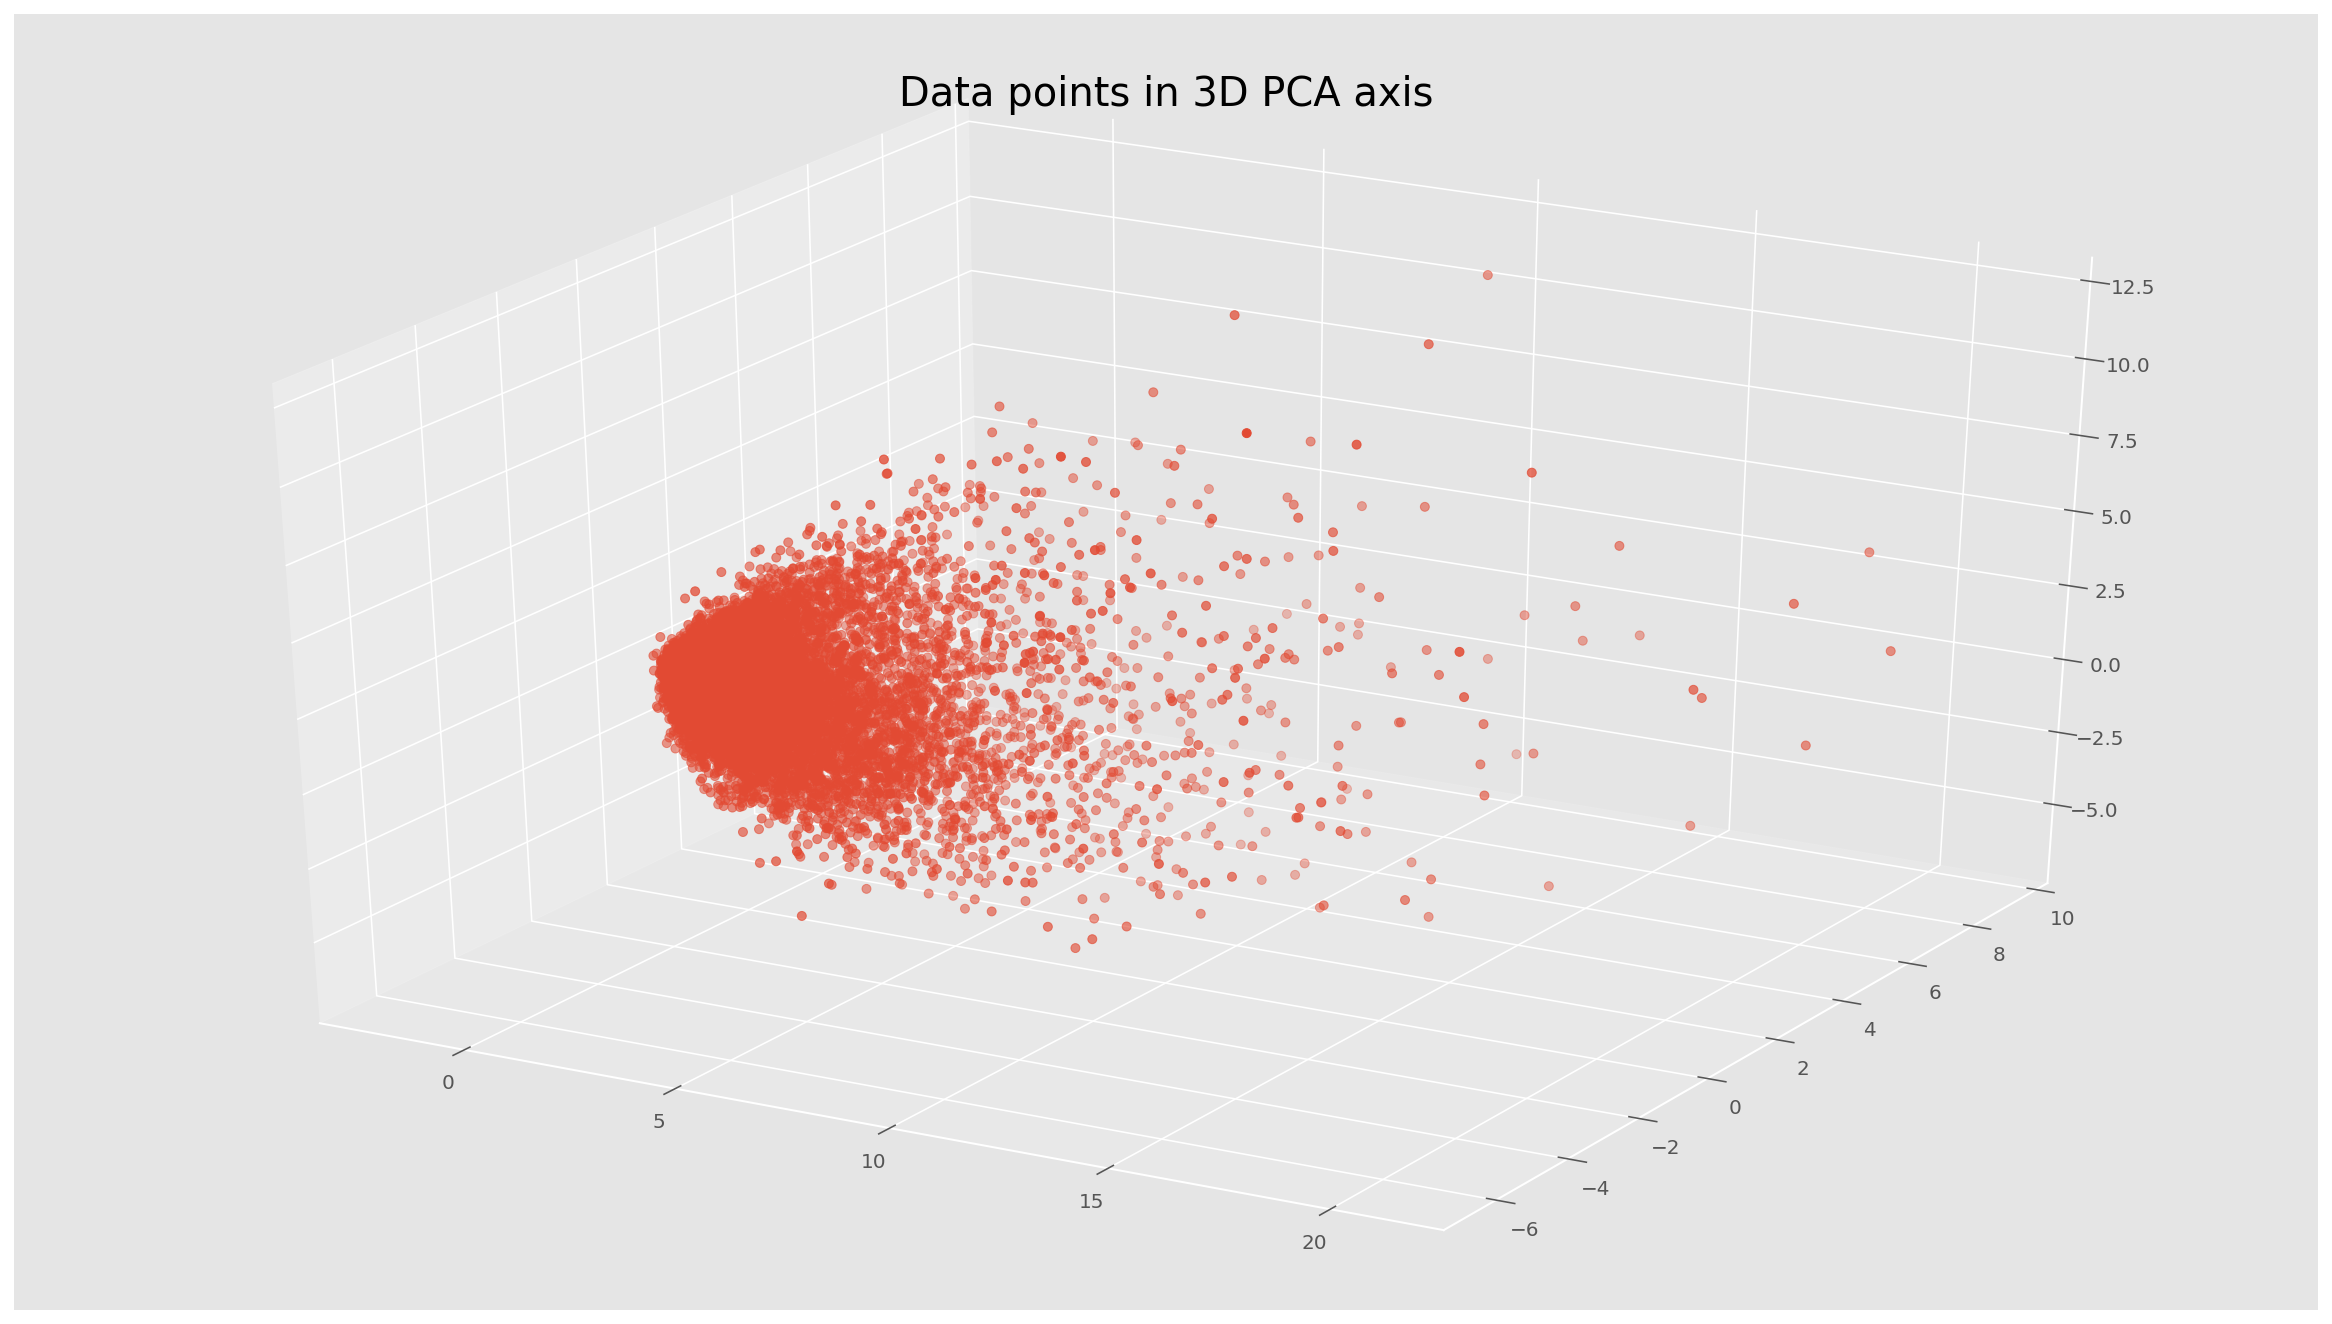

In [29]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1])

plt.title('Data points in 3D PCA axis', fontsize=20)
plt.show()

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
inertia_list = np.empty(8)

for i in range(2,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(tocluster)
    inertia_list[i] = kmeans.inertia_
    scores.append(silhouette_score(tocluster, kmeans.labels_))

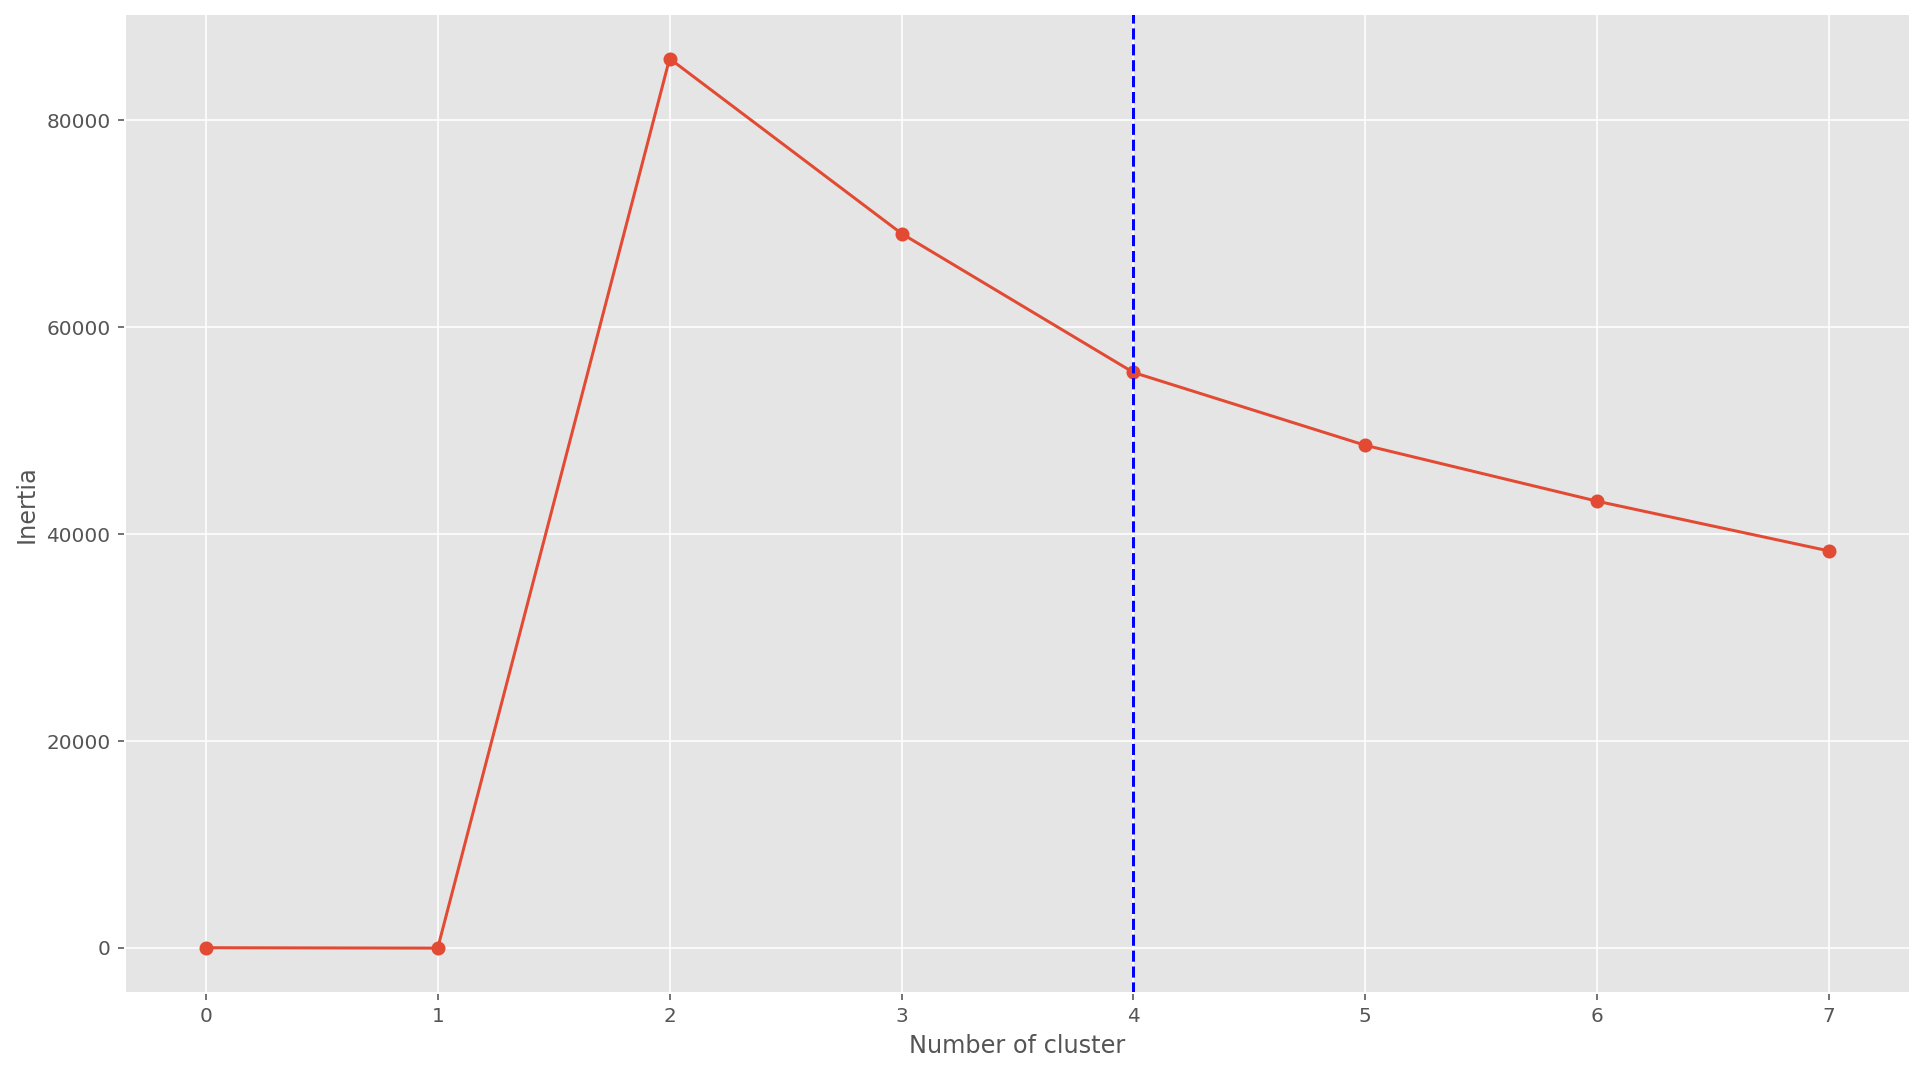

In [31]:
plt.plot(range(0,8),inertia_list,'-o')
plt.xlabel('Number of cluster')
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Inertia')
plt.show()

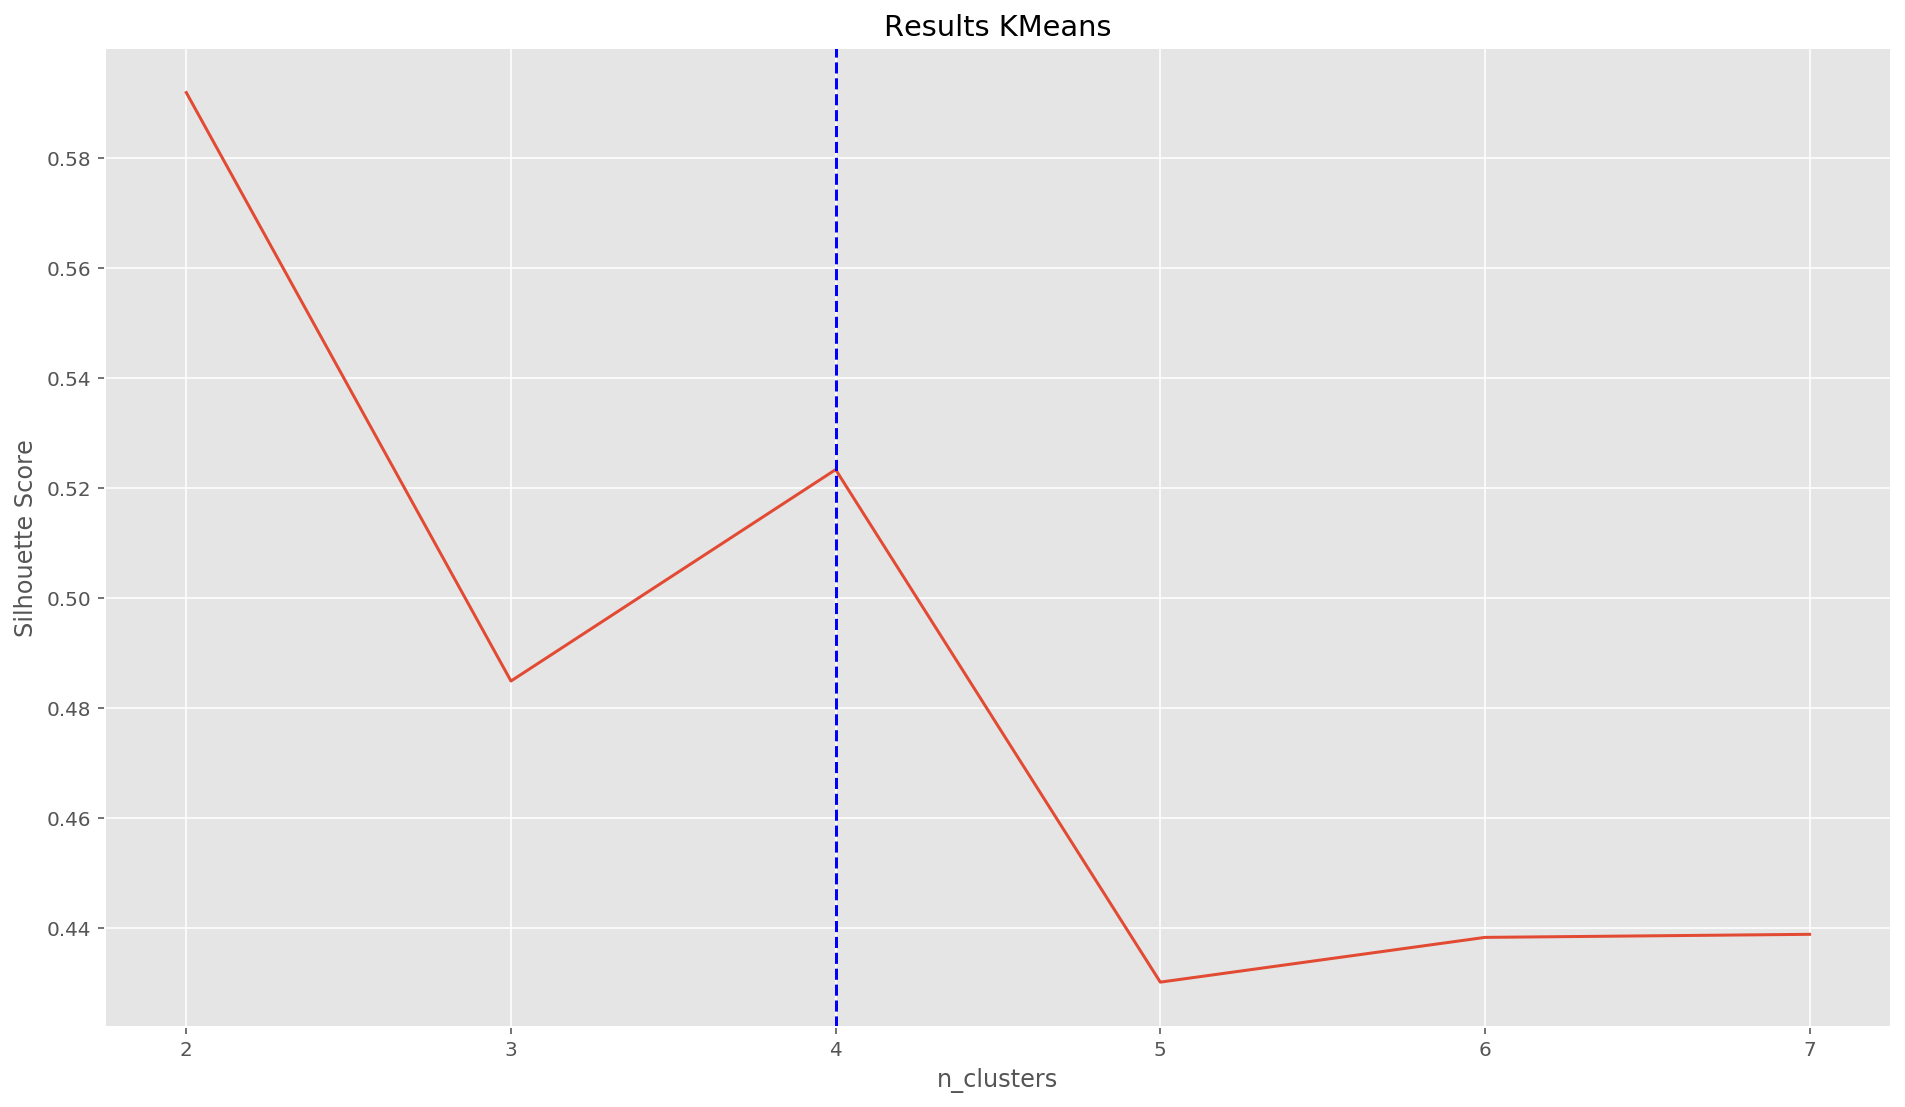

In [32]:
plt.plot(range(2,8), scores);
plt.title('Results KMeans')
plt.xlabel('n_clusters');
plt.axvline(x=4, color='blue', linestyle='--')
plt.ylabel('Silhouette Score');
plt.show()

In [33]:
from sklearn.cluster import KMeans

clusterer = KMeans(n_clusters=4,random_state=30).fit(tocluster)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(tocluster)

centers

array([[-1.09956788, -0.03848558,  0.06957472],
       [ 7.39921431, -0.702936  ,  0.76068757],
       [ 1.89354819, -1.09380405, -0.44075298],
       [ 1.65006305,  2.31954213, -0.01745622]])

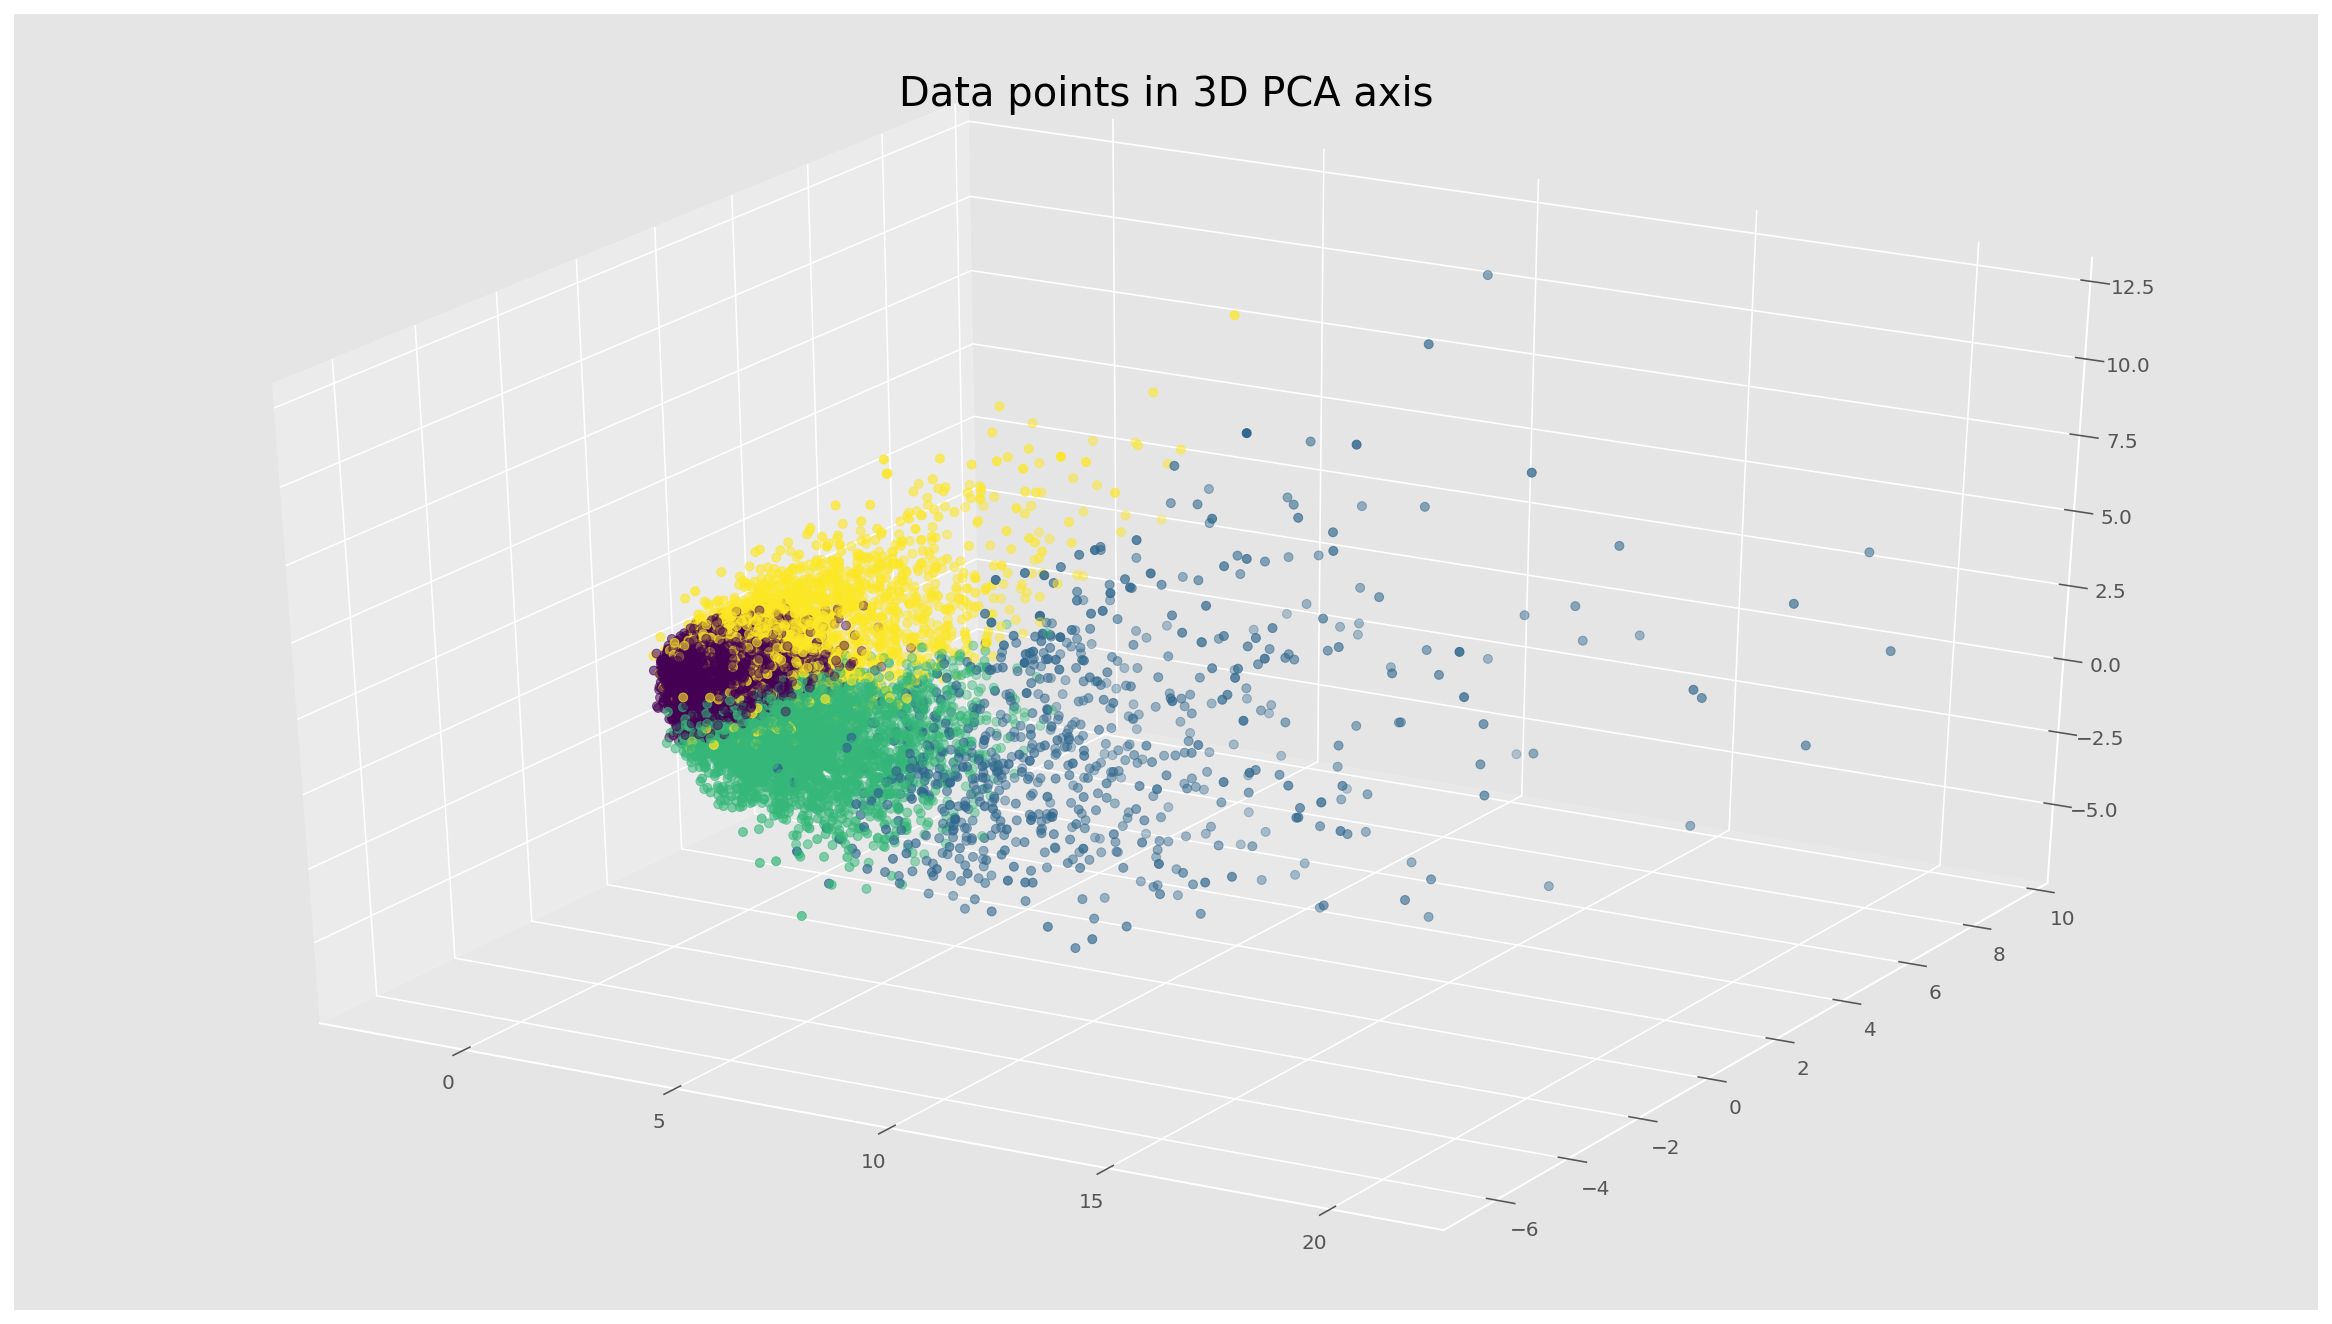

In [34]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(tocluster[0], tocluster[2], tocluster[1], c = c_preds)
plt.title('Data points in 3D PCA axis', fontsize=20)

plt.show()

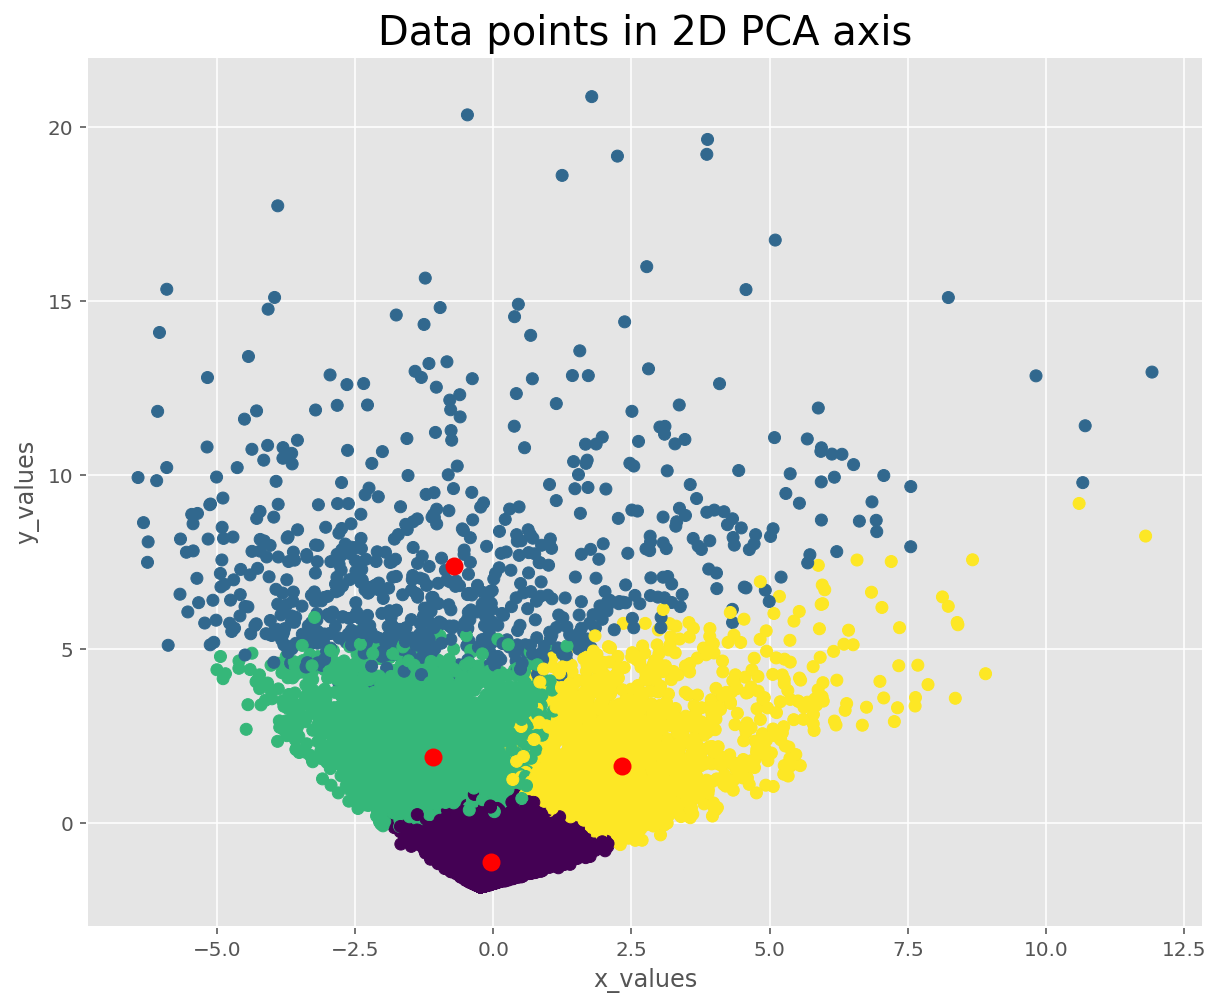

In [35]:
fig = plt.figure(figsize=(10,8))
plt.scatter(tocluster[1],tocluster[0],c = c_preds)
for ci,c in enumerate(centers):
    plt.plot(c[1], c[0], 'o', markersize=8, color='red', alpha=1)

plt.xlabel('x_values')
plt.ylabel('y_values')

plt.title('Data points in 2D PCA axis', fontsize=20)
plt.show()

In [36]:
user_anime['cluster'] = c_preds
user_anime.head(3)

name,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,.hack//Gift,.hack//Intermezzo,.hack//Liminality,...,iDOLM@STER Xenoglossia Specials,lilac (bombs Jun Togawa),makemagic,s.CRY.ed,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,cluster
user_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [37]:
user_anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 1 to 20000
Columns: 7853 entries, &quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi to cluster
dtypes: int32(1), int64(7852)
memory usage: 1.2 GB


In [38]:
c0 = user_anime[user_anime['cluster'] == 0].drop('cluster',axis = 1).mean()
c1 = user_anime[user_anime['cluster'] == 1].drop('cluster',axis = 1).mean()
c2 = user_anime[user_anime['cluster'] == 2].drop('cluster',axis = 1).mean()
c3 = user_anime[user_anime['cluster'] == 3].drop('cluster',axis = 1).mean()

In [62]:
c0.sort_values(ascending=False)[0:15]

name
Death Note                            0.319035
Shingeki no Kyojin                    0.227831
Sword Art Online                      0.196996
Fullmetal Alchemist: Brotherhood      0.179737
Code Geass: Hangyaku no Lelouch       0.177426
Sen to Chihiro no Kamikakushi         0.159012
Angel Beats!                          0.155763
Fullmetal Alchemist                   0.155329
Code Geass: Hangyaku no Lelouch R2    0.151935
Naruto                                0.145075
Elfen Lied                            0.143703
Ouran Koukou Host Club                0.133304
Mirai Nikki (TV)                      0.120017
Toradora!                             0.116190
Howl no Ugoku Shiro                   0.114096
dtype: float64

In [40]:
def createAnimeInfoList(animelist):
    episode_list = list()
    genre_list = list()
    member_list = list()
    rating_list= list()
    for x in anime['name']:
        if x in animelist:
            episode_list.append(anime[anime['name'] == x].episodes.values.astype(int))
            member_list.append(anime[anime['name'] == x].members.values.astype(int))
            rating_list.append(anime[anime['name'] == x].rating.values.astype(int))
            for y in anime[anime['name'] == x].genre.values:
                 genre_list.append(y)
    return genre_list,episode_list,rating_list,member_list

In [41]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split(','):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [42]:
animelist = list(c0.index)
data = pd.DataFrame()
data['genre'],data['episode'],data['rating'],data['member'] =  createAnimeInfoList(animelist)

In [43]:
set_keywords = set()
for liste_keywords in data['genre'].str.split(',').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)

In [44]:
from wordcloud import WordCloud

def makeCloud(Dict,name,color):
    words = dict()

    for s in Dict:
        words[s[0]] = s[1]

        wordcloud = WordCloud(
                      width=1500,
                      height=500, 
                      background_color=color, 
                      max_words=20,
                      max_font_size=500, 
                      normalize_plurals=False)
        wordcloud.generate_from_frequencies(words)


    fig = plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.imshow(wordcloud)
    plt.axis('off')

    plt.show()

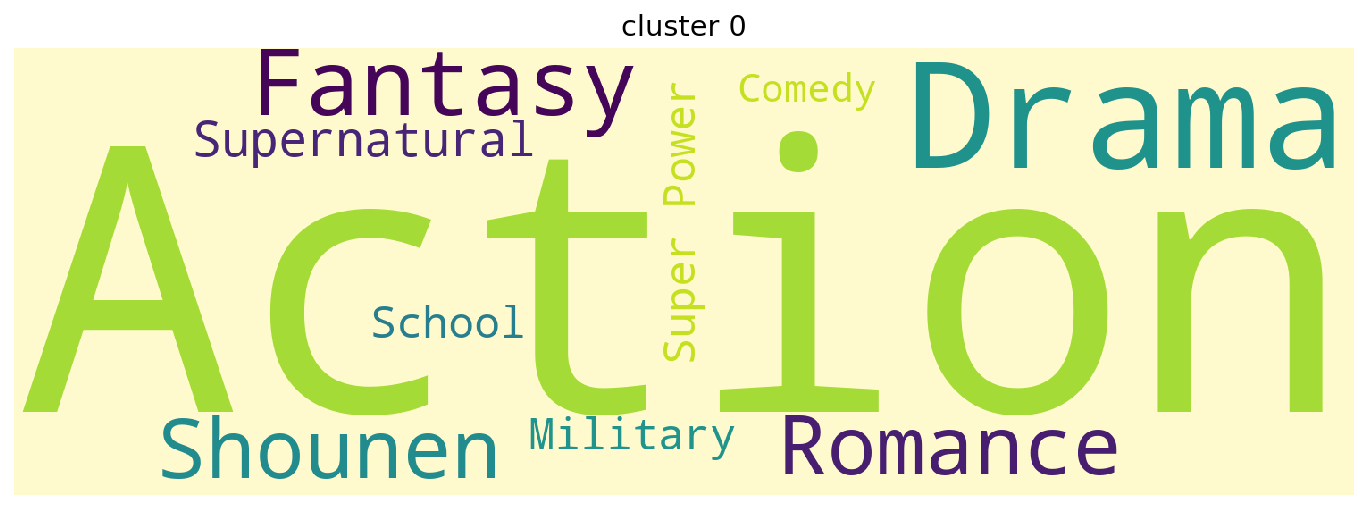

In [45]:
c0_animelist = list(c0.sort_values(ascending=False)[0:15].index)
c0_data = pd.DataFrame()
c0_data['genre'],c0_data['episode'],c0_data['rating'],c0_data['member'] =  createAnimeInfoList(c0_animelist)
c0_data.iloc[:,1:4] = c0_data.iloc[:,1:4].astype(int) # change to numeric object to integer
keyword_occurences, dum = count_word(c0_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 0","lemonchiffon")

In [46]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Fantasy', 5],
 [' Romance', 5],
 [' Shounen', 5]]

In [47]:
print('cluster 0\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c0_data['episode'].mean(), c0_data['rating'].mean(),c0_data['member'].mean()))

cluster 0
AVG episode : 38.46666666666667
AVG movie rating : 7.866666666666666
AVG member : 668177.0666666667


In [48]:
c1.sort_values(ascending=False)[0:15]

name
Angel Beats!                                           0.828571
No Game No Life                                        0.821769
Toradora!                                              0.809524
Steins;Gate                                            0.793197
Code Geass: Hangyaku no Lelouch                        0.789116
Shingeki no Kyojin                                     0.783673
Sword Art Online                                       0.764626
Code Geass: Hangyaku no Lelouch R2                     0.763265
Death Note                                             0.746939
Bakemonogatari                                         0.745578
Fullmetal Alchemist: Brotherhood                       0.731973
Hataraku Maou-sama!                                    0.727891
Mirai Nikki (TV)                                       0.725170
Yahari Ore no Seishun Love Comedy wa Machigatteiru.    0.714286
Clannad                                                0.711565
dtype: float64

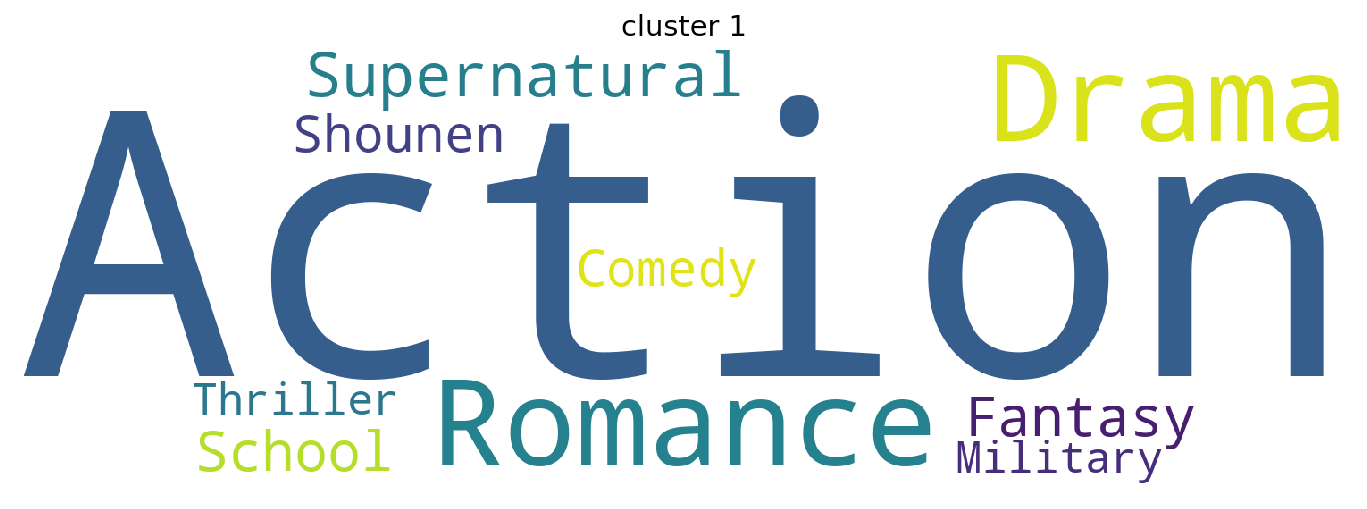

In [49]:
c1_animelist = list(c1.sort_values(ascending=False)[0:15].index)
c1_data = pd.DataFrame()
c1_data['genre'],c1_data['episode'],c1_data['rating'],c1_data['member'] =  createAnimeInfoList(c1_animelist)
c1_data.iloc[:,1:4] = c1_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c1_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 1","white")

In [50]:
keyword_occurences[0:5]

[['Action', 7],
 [' Romance', 6],
 [' Drama', 6],
 [' Supernatural', 6],
 [' Fantasy', 5]]

In [51]:
print('cluster 1\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c1_data['episode'].mean(), c1_data['rating'].mean(),c1_data['member'].mean()))

cluster 1
AVG episode : 24.333333333333332
AVG movie rating : 8.066666666666666
AVG member : 665432.4666666667


In [52]:
c2.sort_values(ascending=False)[0:15]

name
Shingeki no Kyojin                                          0.721744
No Game No Life                                             0.633343
Sword Art Online                                            0.608425
Death Note                                                  0.589439
Angel Beats!                                                0.589143
Steins;Gate                                                 0.544646
Fullmetal Alchemist: Brotherhood                            0.535449
Toradora!                                                   0.509938
Mirai Nikki (TV)                                            0.504005
Code Geass: Hangyaku no Lelouch                             0.501335
Code Geass: Hangyaku no Lelouch R2                          0.473450
One Punch Man                                               0.457728
Noragami                                                    0.457134
Tokyo Ghoul                                                 0.454168
Ano Hi Mita Hana no Namae wo 

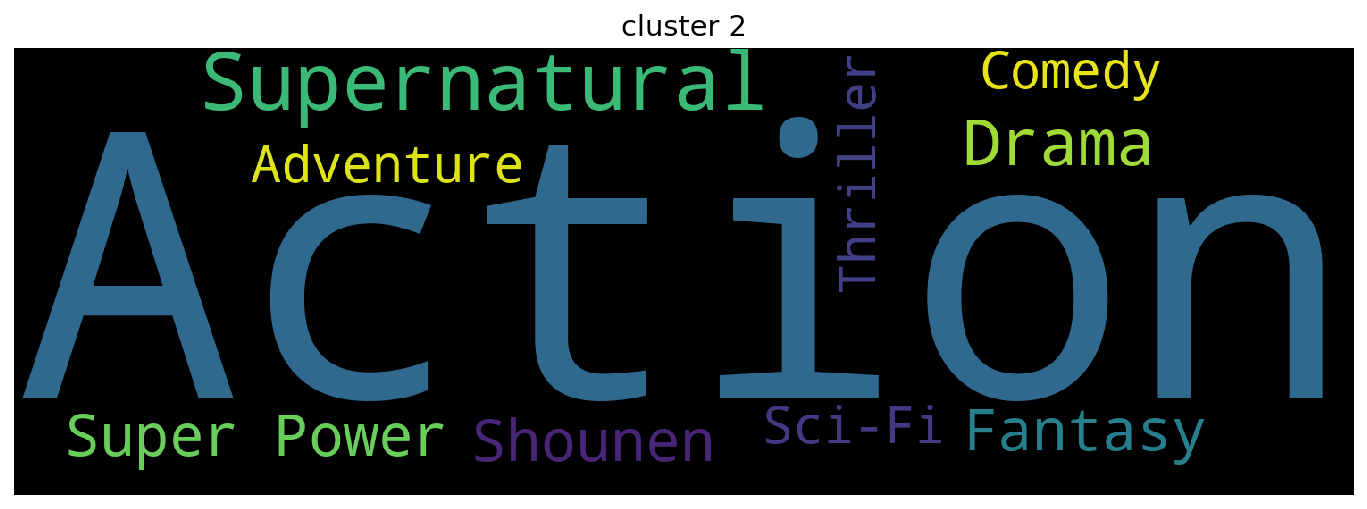

In [53]:
c2_animelist = list(c2.sort_values(ascending=False)[0:15].index)
c2_data = pd.DataFrame()
c2_data['genre'],c2_data['episode'],c2_data['rating'],c2_data['member'] =  createAnimeInfoList(c2_animelist)
c2_data.iloc[:,1:4] = c2_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c2_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 2","black")

In [54]:
keyword_occurences[0:5]

[['Action', 10],
 [' Supernatural', 8],
 [' Drama', 5],
 [' Fantasy', 4],
 [' Shounen', 4]]

In [55]:
c2_data['episode'].mean()

23.2

In [56]:
print('cluster 2\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c2_data['episode'].mean(), c2_data['rating'].mean(),c2_data['member'].mean()))

cluster 2
AVG episode : 23.2
AVG movie rating : 8.066666666666666
AVG member : 687956.2


In [57]:
c3.sort_values(ascending=False)[0:15]

name
Death Note                            0.679863
Code Geass: Hangyaku no Lelouch       0.667644
Code Geass: Hangyaku no Lelouch R2    0.609482
Fullmetal Alchemist                   0.601173
Sen to Chihiro no Kamikakushi         0.583089
Suzumiya Haruhi no Yuuutsu            0.549853
Neon Genesis Evangelion               0.538612
Tengen Toppa Gurren Lagann            0.529814
Cowboy Bebop                          0.525415
Fullmetal Alchemist: Brotherhood      0.506843
Mononoke Hime                         0.499022
Toradora!                             0.487292
Elfen Lied                            0.480938
Howl no Ugoku Shiro                   0.477517
Samurai Champloo                      0.477028
dtype: float64

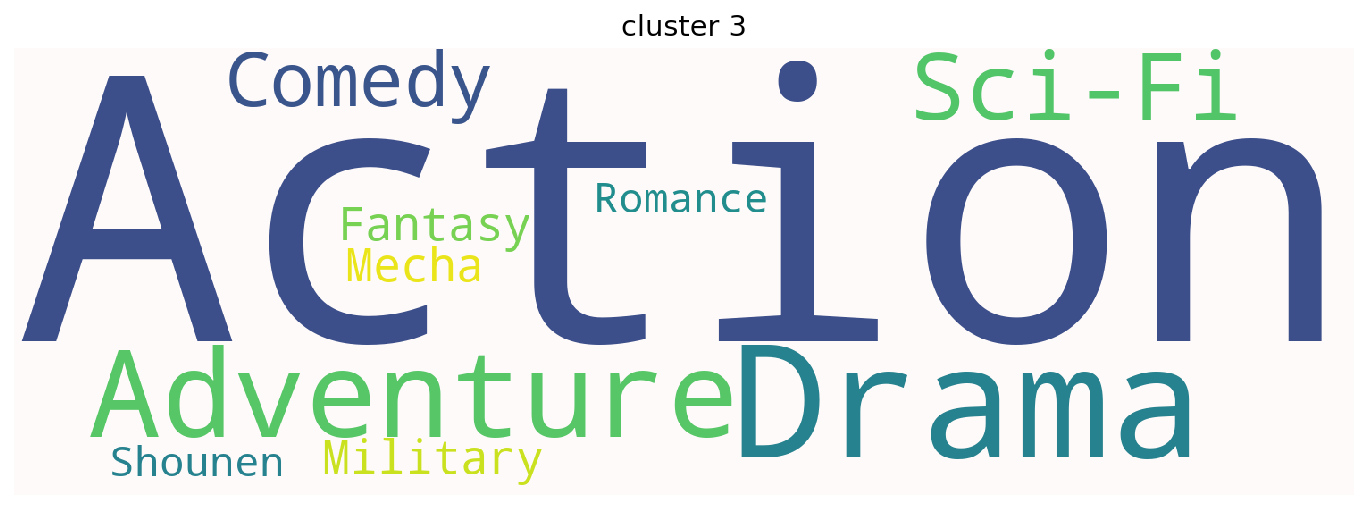

In [58]:
c3_animelist = list(c3.sort_values(ascending=False)[0:15].index)
c3_data = pd.DataFrame()
c3_data['genre'],c3_data['episode'],c3_data['rating'],c3_data['member'] =  createAnimeInfoList(c3_animelist)
c3_data.iloc[:,1:4] = c3_data.iloc[:,1:4].astype(int)
keyword_occurences, dum = count_word(c3_data, 'genre', set_keywords)
makeCloud(keyword_occurences[0:10],"cluster 3","snow")

In [59]:
keyword_occurences[0:5]

[['Action', 10],
 [' Drama', 8],
 [' Adventure', 6],
 [' Sci-Fi', 6],
 [' Comedy', 4]]

In [60]:
print('cluster 3\nAVG episode : {0}\nAVG movie rating : {1}\nAVG member : {2}'
      .format(c3_data['episode'].mean(), c3_data['rating'].mean(),c3_data['member'].mean()))

cluster 3
AVG episode : 24.133333333333333
AVG movie rating : 8.0
AVG member : 561513.7333333333
